In [10]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

x, y, t, n, a, b, C, c, r, u, s = smp.symbols('x y t n a b C c r u s')
f, g, m = smp.symbols('f g m', cls=smp.Function)

In [4]:
# Factoring / Expanding

y = x**2 + 4*x + 3
z = y**2

# z.factor()

z.expand()

x**4 + 8*x**3 + 22*x**2 + 24*x + 9

In [5]:
# Solving with smp.solve(f, x)
# Per notation: smp.solve(f, x) finds the value of x that makes f(x) = 0

smp.solve(z, x)

smp.solve(smp.sin(x), x)

[0, pi]

In [6]:
# Good Practice: If you know that x is real (and/or non-negative), 
# it's good practice to specify this when defining variables to prevent 
# issues when solving more complex problems (esp. w/ integrals)

x = smp.symbols('x')

smp.solve(x**2 + 1, x) # Since this equation has no real roots, it shows that goes from -infinity to infinity. 

x = smp.symbols('x', real=True)
smp.solve(x**2 + 1) # Yields no solutions

x = smp.symbols('x', real=True, positive=True)
smp.solve(x + 4) # Yields no solutions

[]

In [11]:
# Declaring multiple variables at once:

x, y, z = smp.symbols('x y z')
F = x**2 + smp.sin(z) * y
F

x**2 + y*sin(z)

In [12]:
# Can solve multivariable expressions. Solving for x with F=0
# Answers given in an array

x_sols = smp.solve(F, x)
x_sols

[-sqrt(-y*sin(z)), sqrt(-y*sin(z))]

In [13]:
# Solving for y with F=0
# Answers given in an array

y_sols = smp.solve(F, y)
y_sols

[-x**2/sin(z)]

In [14]:
# Solving for z with F=0
# Answers given in an array

z_sols = smp.solve(F, z)
z_sols

[asin(x**2/y) + pi, -asin(x**2/y)]

In [15]:
# Converting a sympy expression into a numerical function to plot on computer

expr = z_sols[0]
expr

asin(x**2/y) + pi

In [16]:
expr_f = smp.lambdify([x, y], expr)
expr_f(1, 2)

3.6651914291880923

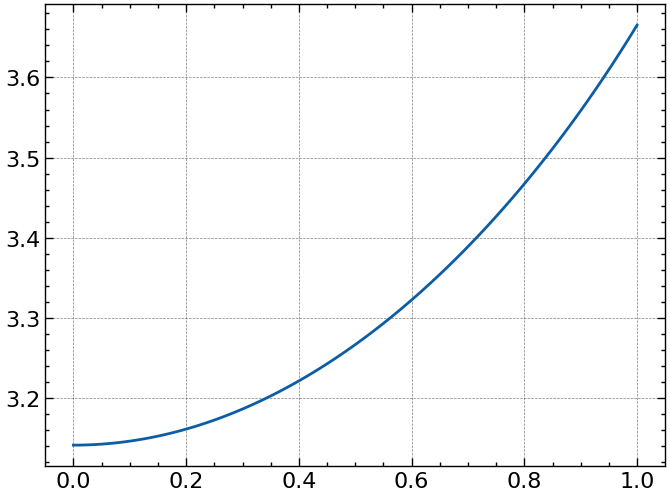

In [17]:
x_num = np.linspace(0, 1, 100)
y_num = 2

plt.plot(x_num, expr_f(x_num, y_num))
plt.show()

First Year Calc

In [18]:
smp.limit(smp.sin(x/2 + smp.sin(x)), x, smp.pi)

1

In [19]:
smp.diff(((1 + smp.sin(x)) / (1 - smp.cos(x)))**2, x)

2*(sin(x) + 1)*cos(x)/(1 - cos(x))**2 - 2*(sin(x) + 1)**2*sin(x)/(1 - cos(x))**3

In [20]:
f, g = smp.symbols('f g', cls=smp.Function)
g = g(x)
f = f(x+g)

dfdx = smp.diff(f, x)

dfdx

(Derivative(g(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + g(x))

In [21]:
dfdx.subs([(g, smp.sin(x))]).doit()

(cos(x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

In [23]:
smp.integrate(smp.csc(x)*smp.cot(x), x) # + C

-1/sin(x)

In [24]:
smp.integrate(smp.exp(x) / smp.sqrt(smp.exp(2*x) + 9), (x, 0, smp.log(4)))

-asinh(1/3) + asinh(4/3)

In [25]:
t = smp.symbols('t')

smp.integrate(x**10*smp.exp(x), (x, 1, t))

(t**10 - 10*t**9 + 90*t**8 - 720*t**7 + 5040*t**6 - 30240*t**5 + 151200*t**4 - 604800*t**3 + 1814400*t**2 - 3628800*t + 3628800)*exp(t) - 1334961*E